<a href="https://colab.research.google.com/github/Shakibap/Data-Science-Portfo/blob/Data_Science/regression_maktabkhooneh_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [1]:
#from google.colab import files
#files.upload()

In [ ]:
data_full = pd.read_csv('1632300362534233.csv')

In [ ]:
data_full.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [ ]:
data_full.shape

(3479, 8)

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [ ]:
data = data_full.copy()

In [ ]:
# Area is a float data
data['Area'] = data.Area.str.replace(',', '').astype(float)


In [ ]:
data.Area.dtype

dtype('float64')

In [ ]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [ ]:
#dropping the null data
data.dropna(inplace=True)

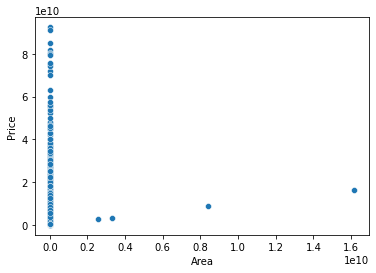

In [ ]:
# detecting the outliers
sns.scatterplot(data=data , x='Area', y ='Price')

In [ ]:
# outliers
data[data.Area>20000]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
570,3.310000e+09,2,True,True,True,Ostad Moein,3.310000e+09,110333.33
709,1.616000e+10,3,True,True,True,Pasdaran,1.616000e+10,538666.67
1604,8.400000e+09,2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2802,2.550000e+09,2,True,True,True,Central Janatabad,2.550000e+09,85000.00


In [ ]:
# removing the outliers
data = data[data.Area<2000]

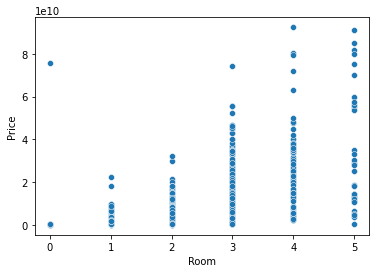

In [ ]:
# detecting the outliers
sns.scatterplot(data=data , x='Room', y ='Price')

In [ ]:
# the houses with no room and high prices are suspicious
data[data.Room==0]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
103,40.0,0,False,False,False,Shahrake Qods,2.480000e+08,8266.67
137,40.0,0,False,False,False,Pakdasht,1.650000e+08,5500.00
1169,40.0,0,False,True,False,Ostad Moein,6.500000e+08,21666.67
2084,40.0,0,False,False,False,Pakdasht,1.650000e+08,5500.00
2103,43.0,0,False,True,False,Nasim Shahr,3.600000e+08,12000.00
2625,50.0,0,True,True,True,Northern Chitgar,3.450000e+08,11500.00
2721,110.0,0,True,True,True,Parand,1.020000e+08,3400.00
3107,630.0,0,False,False,False,Tajrish,7.560000e+10,2520000.00
3211,30.0,0,False,True,False,Ostad Moein,5.000000e+08,16666.67
3435,54.0,0,False,False,False,Shahrake Qods,4.700000e+08,15666.67


In [ ]:
#removing the outlier
# the house with an area of 630 and no room is an outlier
data.drop(index=3107, inplace=True)

In [ ]:
# encoding the categorical data
encoder = LabelEncoder()
df = data.copy()
df['Address'] = encoder.fit_transform(data.Address)

In [ ]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,156,1.850000e+09,61666.67
1,60.0,1,True,True,True,156,1.850000e+09,61666.67
2,79.0,2,True,True,True,117,5.500000e+08,18333.33
3,95.0,2,True,True,True,152,9.025000e+08,30083.33
4,123.0,2,True,True,True,150,7.000000e+09,233333.33


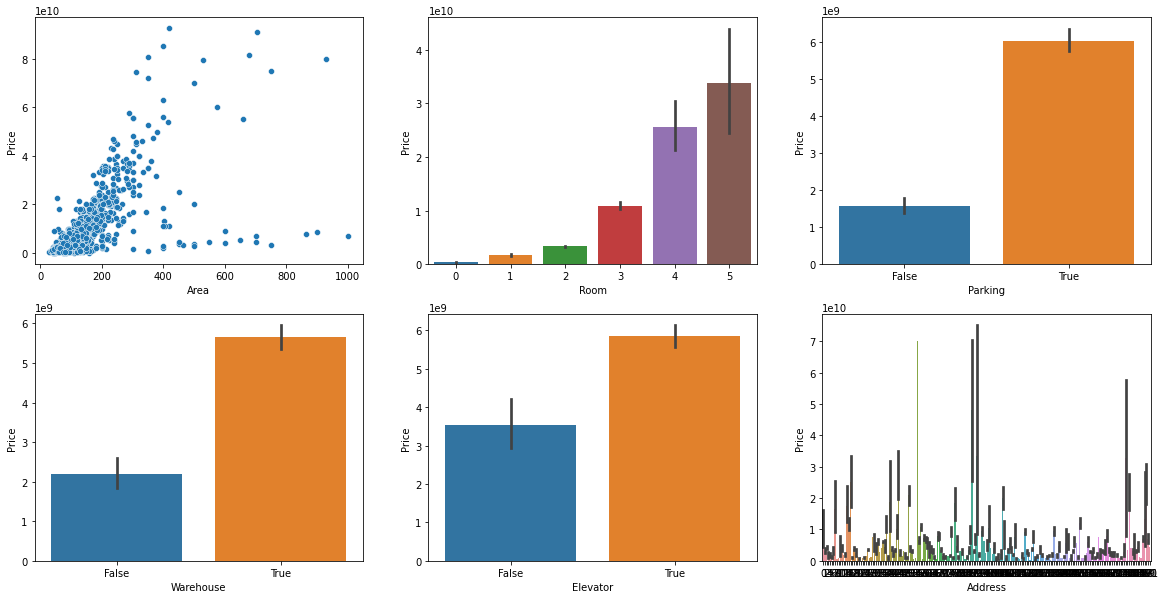

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(20,10))
sns.scatterplot(data=df, x='Area', y='Price', ax=axs[0,0])
sns.barplot(data=df, x='Room', y='Price', ax=axs[0,1])
sns.barplot(data=df, x='Parking', y='Price', ax=axs[0,2])
sns.barplot(data=df, x='Warehouse', y='Price', ax=axs[1,0])
sns.barplot(data=df, x='Elevator', y='Price', ax=axs[1,1])
sns.barplot(data=df, x='Address', y='Price', ax=axs[1,2])
plt.show()


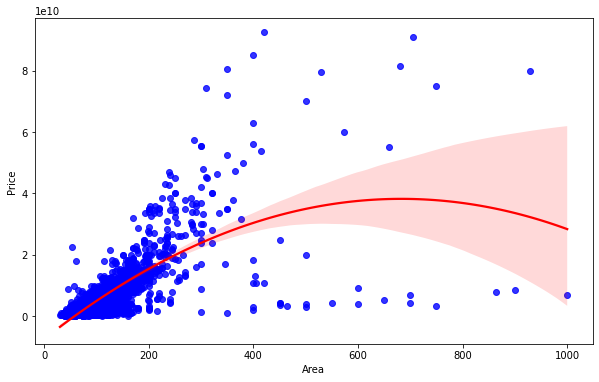

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x="Area", y="Price", data=df, order=2, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [ ]:
X = df.drop(columns=['Price', 'Price(USD)'])
y = df.Price

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

print('r2_score: %.2f'% r2_score(y_test, y_pred))

r2_score: 0.74
